<a href="https://colab.research.google.com/github/vistec-AI/colab/blob/master/lottery.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

จาก [post นี้](https://www.facebook.com/ta.chiraphadhanakul/posts/10158937922963278) และดึงข้อมูลตาม [youtube](https://youtu.be/1_bfkE_jqmM?t=653)

In [113]:
import re
import pandas as pd
from collections import Counter
from requests import get

In [114]:
!pip install kora -q
from kora.bs import Soup  # BeautifulSoup แบบใช้ง่าย

In [115]:
url = "https://www.myhora.com/หวย/สถิติหวย-ปี-2561.aspx?mode=year&value=2561"

In [118]:
src = get(url).text
len(src)

369863

In [ ]:
soup = Soup(src)

In [119]:
rows = soup.select(".rowx.div_link")
len(rows)

24

In [120]:
row = rows[0]
row

<div class="rowx div_link" onclick="window.open('%e0%b8%87%e0%b8%a7%e0%b8%94-30-%e0%b8%98%e0%b8%b1%e0%b8%99%e0%b8%a7%e0%b8%b2%e0%b8%84%e0%b8%a1-2561.aspx','_blank');" style="height:25px;padding-top:8px;width:100%; cursor:pointer;" title="ใบตรวจหวย ตรวจสลากกินแบ่งรัฐบาล ลอตเตอรี่ งวดวันที่  30 ธันวาคม 2561">
<div class="rowx-item" style="width:5%;margin-left:5px;"> 30 </div>
<div class="rowx-item mobile-hide" style="width:12%"> ธันวาคม </div>
<div class="rowx-item mobile-show" style="width:12%"> ธ.ค. </div>
<div class="rowx-item mobile-hide" style="width:7%"> 2561 </div>
<div class="rowx-item mobile-show" style="width:7%"> 61 </div>
<div class="rowx-item rowhld" style="width:17%;text-align:center">735867</div>
<div class="rowx-item rowhld mobile-hide" style="width:6%;text-align:center">67</div>
<div class="rowx-item rowhld mobile-hide" style="width:9%;text-align:center">867</div>
<div class="rowx-item rowhld mobile-hide" style="width:7%;text-align:center">02</div>
<div class="rowx-item 

In [121]:
cols = [x.text.strip() for x in row.select('div')]
cols

['30',
 'ธันวาคม',
 'ธ.ค.',
 '2561',
 '61',
 '735867',
 '67',
 '867',
 '02',
 '031 913 701 884',
 '02',
 '031 913 701 884']

In [122]:
# เขียนเป็น function ละกัน
def get_year(year):
  url = f"https://www.myhora.com/หวย/สถิติหวย-ปี-{year}.aspx?mode=year&value={year}"
  rows = Soup(url).select(".rowx.div_link")
  data = []
  for row in rows:
    cols = row.select('div')[:9]  # เอาหลักๆ พอ
    data.append([x.text.strip() for x in cols])
  return data

In [123]:
# ลองเรียกใช้ดู
data = get_year(2561)
len(data)  # 24
data[0]

['30', 'ธันวาคม', 'ธ.ค.', '2561', '61', '735867', '67', '867', '02']

In [124]:
data[1]

['16', 'ธันวาคม', 'ธ.ค.', '2561', '61', '356564', '64', '564', '62']

In [125]:
columns = ['day', 'month', 'mo', 'year', 'yr', 'first', 'high2', 'high3', 'low2' ]
df = pd.DataFrame(data, columns=columns)
df.head()

,day,month,mo,year,yr,first,high2,high3,low2
0,30,ธันวาคม,ธ.ค.,2561,61,735867,67,867,02
1,16,ธันวาคม,ธ.ค.,2561,61,356564,64,564,62
2,1,ธันวาคม,ธ.ค.,2561,61,021840,40,840,67
3,16,พฤศจิกายน,พ.ย.,2561,61,989903,03,903,16
4,1,พฤศจิกายน,พ.ย.,2561,61,149840,40,840,58


In [ ]:
# น่าเปลี่ยน index เป็น date ไปเลย จะได้ query ได้ง่ายๆ

In [126]:
day = 30
month = 'ธันวาคม'
mo = 'ธ.ค.'
year = 2561
months = 'x ม.ค. ก.พ. มี.ค. เม.ย. พ.ค. มิ.ย. ก.ค. ส.ค. ก.ย. ต.ค. พ.ย. ธ.ค.'.split()
m = months.index(mo)
y = int(year) - 543
f'{y}-{m:02}-{day}'

'2018-12-30'

In [128]:
months = '''x มกราคม กุมภาพันธ์ มีนาคม เมษายน พฤษภาคม มิถุนายน กรกฎาคม สิงหาคม 
            กันยายน ตุลาคม พฤศจิกายน ธันวาคม'''.split()

def datestr(day, month, tyear):
  #months = 'x ม.ค. ก.พ. มี.ค. เม.ย. พ.ค. มิ.ย. ก.ค. ส.ค. ก.ย. ต.ค. พ.ย. ธ.ค.'.split()
  d = int(day)
  m = months.index(month)
  y = int(tyear) - 543
  return f'{y}-{m:02}-{d:02}'

datestr(day, month, year)

'2018-12-30'

In [ ]:
def extract_row(row):
  cols = [x.text.strip() for x in row.select('div')[:9]]
  dstr = datestr(cols[0], cols[1], cols[3])
  return [dstr, *cols]

In [129]:
extract_row(row)

['2018-12-30',
 '30',
 'ธันวาคม',
 'ธ.ค.',
 '2561',
 '61',
 '735867',
 '67',
 '867',
 '02']

In [130]:
# แก้ get_year ใหม่
def get_year(year):
  url = f"https://www.myhora.com/หวย/สถิติหวย-ปี-{year}.aspx?mode=year&value={year}"
  rows = Soup(url).select(".rowx.div_link")
  return list(map(extract_row, rows))

In [131]:
data = get_year(2561)
data[0]

['2018-12-30',
 '30',
 'ธันวาคม',
 'ธ.ค.',
 '2561',
 '61',
 '735867',
 '67',
 '867',
 '02']

In [132]:
columns = ['dstr', 'day', 'month', 'mo', 'year', 'yr', 'first', 'high2', 'high3', 'low2' ]
df = pd.DataFrame(data, columns=columns).set_index('dstr')
df.head()

,day,month,mo,year,yr,first,high2,high3,low2
dstr,,,,,,,,,
2018-12-30,30,ธันวาคม,ธ.ค.,2561,61,735867,67,867,02
2018-12-16,16,ธันวาคม,ธ.ค.,2561,61,356564,64,564,62
2018-12-01,1,ธันวาคม,ธ.ค.,2561,61,021840,40,840,67
2018-11-16,16,พฤศจิกายน,พ.ย.,2561,61,989903,03,903,16
2018-11-01,1,พฤศจิกายน,พ.ย.,2561,61,149840,40,840,58


In [133]:
y2data = {}  # ทำทีละปี เผื่อมี error

In [134]:
# ดึงมาทั้ง 30 ปี
for y in range(2533, 2563+1):
  print(y-2500, end=',')
  y2data[y] = get_year(y)

33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,

In [135]:
data = []
for y in range(2533, 2563+1):
  data.extend(y2data[y])
len(data)

733

In [136]:
df = (pd.DataFrame(data, columns=columns)
        .set_index('dstr')
        .sort_index(ascending=False)
)
print(df.shape)
df.head()

(733, 9)


,day,month,mo,year,yr,first,high2,high3,low2
dstr,,,,,,,,,
2020-09-01,1,กันยายน,ก.ย.,2563,63,999997,97,997,98
2020-08-16,16,สิงหาคม,ส.ค.,2563,63,945811,11,811,88
2020-08-01,1,สิงหาคม,ส.ค.,2563,63,569391,91,391,92
2020-07-16,16,กรกฎาคม,ก.ค.,2563,63,873286,86,286,53
2020-07-01,1,กรกฎาคม,ก.ค.,2563,63,347258,58,258,83


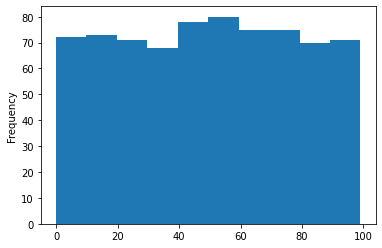

In [137]:
# กระจายของเลขท้าย 2 ตัวบน
df.high2.astype(int).plot.hist();

In [138]:
# เตรียม data เรียบร้อยซะที. ทำมาตั้งเยอะ แต่ใช้แค่รางวัลที่ 1
numbers = list(df['first'])
len(numbers)

733

In [139]:
numbers[:5]

['999997', '945811', '569391', '873286', '347258']

In [140]:
# คำนวณ ว่าซ้ำกี่ตัว
num = '945811'
prev = ''
n_rep = [1,1,1,1,1,1]
for i, c in enumerate(num):
  if c==prev:
    n_rep[i] = n_rep[i-1] + 1
  prev = c
max(n_rep)

2

In [141]:
# สร้างเป็น function
def count_repeat(num):
  """ นับตัวที่ซ้ำ แต่ต้องอยู่ติดกันนะ """
  prev = ''
  n_rep = [1]*len(num)
  for i, c in enumerate(num):
    if c==prev:
      n_rep[i] = n_rep[i-1] + 1
    prev = c
  return max(n_rep)

In [146]:
count_repeat('99999') # 5
count_repeat('44999') # 3
count_repeat('44912') # 2
count_repeat('945811') # 2
count_repeat('999997') # 5

5

In [147]:
# หรือถ้าใช้ regex
max(len(m[1]) for m in re.finditer(r'((\d)\2+)', '999997'))

5

In [148]:
Counter(map(count_repeat, numbers))  # ครั้งเดียวใน 30 ปี ที่มีซ้ำ 5 ตัว

Counter({1: 415, 2: 288, 3: 25, 4: 4, 5: 1})

In [149]:
# ใส่ใน dataframe ดีกว่าจะได้ดูง่ายๆ
df['repeat'] = df['first'].map(count_repeat)

In [151]:
df.head()

,day,month,mo,year,yr,first,high2,high3,low2,repeat
dstr,,,,,,,,,,
2020-09-01,1,กันยายน,ก.ย.,2563,63,999997,97,997,98,5
2020-08-16,16,สิงหาคม,ส.ค.,2563,63,945811,11,811,88,2
2020-08-01,1,สิงหาคม,ส.ค.,2563,63,569391,91,391,92,1
2020-07-16,16,กรกฎาคม,ก.ค.,2563,63,873286,86,286,53,1
2020-07-01,1,กรกฎาคม,ก.ค.,2563,63,347258,58,258,83,1


In [ ]:
# df.index.name = None  # ให้ประหยัดที่ capture

In [152]:
df[df.repeat==5]  # เมื่อไหร่ที่ซ้ำ 5 ตัว

,day,month,mo,year,yr,first,high2,high3,low2,repeat
dstr,,,,,,,,,,
2020-09-01,1,กันยายน,ก.ย.,2563,63,999997,97,997,98,5


In [153]:
df[df.repeat==4] # เมื่อไหร่ที่ซ้ำ 4 ตัว

,day,month,mo,year,yr,first,high2,high3,low2,repeat
dstr,,,,,,,,,,
2015-06-02,2,มิถุนายน,มิ.ย,2558,58,388881,81,881,65,4
2011-11-16,16,พฤศจิกายน,พ.ย.,2554,54,997777,77,777,57,4
1998-07-16,16,กรกฎาคม,ก.ค.,2541,41,599991,91,991,52,4
1997-10-01,1,ตุลาคม,ต.ค.,2540,40,444413,13,413,24,4


In [154]:
df.repeat.value_counts()  # สูตรคำนวน อาจจะต่างจากต้าหน่อย

1    415
2    288
3     25
4      4
5      1
Name: repeat, dtype: int64

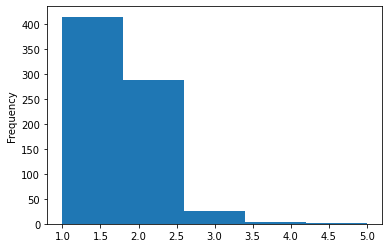

In [155]:
df.repeat.plot.hist(bins=5); 

In [156]:
# ตรวจว่า regex ก็คำนวณถูก
for num in df['first']:
  rp = max(len(m[1]) for m in re.finditer(r'((\d)\2*)', num))
  assert count_repeat(num)==rp

In [ ]:
df.index.name = 'dstr'  # ใส่คืน

In [157]:
# เก็บ df ไว้ใช้ จะได้ไม่ต้องมา scrape ทุกรอบ
df.to_csv('thai_lottery.csv')

In [ ]:
from kora import drive
drive.upload_public('thai_lottery.csv')  # ส่งขึ้น google drive ง่ายๆ เลย

'https://drive.google.com/uc?id=1Jt86RNveKPAJdJKUpEHNXutyCt7H73Cc'

In [158]:
!head thai_lottery.csv

dstr,day,month,mo,year,yr,first,high2,high3,low2,repeat
2020-09-01,1,กันยายน,ก.ย.,2563,63,999997,97,997,98,5
2020-08-16,16,สิงหาคม,ส.ค.,2563,63,945811,11,811,88,2
2020-08-01,1,สิงหาคม,ส.ค.,2563,63,569391,91,391,92,1
2020-07-16,16,กรกฎาคม,ก.ค.,2563,63,873286,86,286,53,1
2020-07-01,1,กรกฎาคม,ก.ค.,2563,63,347258,58,258,83,1
2020-06-16,16,มิถุนายน,มิ.ย,2563,63,516967,67,967,64,1
2020-06-01,1,มิถุนายน,มิ.ย,2563,63,831567,67,567,24,1
2020-04-01,1,เมษายน,เม.ย.,2563,63,051095,95,095,22,1
2020-03-16,16,มีนาคม,มี.ค.,2563,63,503446,46,446,77,2
